In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
dna_data = pd.read_csv("Cleaned_Date_DNA_Data.csv")

In [3]:
dna_data.head()

,Unnamed: 0,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Sample Date,Sample Time
0,3,10601.0,2019-06-03 12:08:00,63rd Street,15.0,121.0,42.6,41.7827,-87.5748,2019-06-03,12:08:00
1,4,10600.0,2019-06-03 12:08:00,South Shore,1006.0,16.0,126.9,41.7689,-87.5636,2019-06-03,12:08:00
2,5,10582.0,2019-06-03 12:10:00,North Avenue,69.0,8.0,23.5,41.9148,-87.6273,2019-06-03,12:10:00
3,6,10646.0,2019-06-03 12:12:00,Howard,90.0,169.0,123.3,42.0188,-87.6663,2019-06-03,12:12:00
4,7,10599.0,2019-06-03 12:08:00,Rainbow,150.0,245.0,191.7,41.7580,-87.5510,2019-06-03,12:08:00


In [4]:
test = "2016-08-04"

formatted = datetime.datetime.strptime(test, "%Y-%m-%d")

In [5]:
formatted.month

8

In [6]:
dna_data["Sample Month"] = ""

for index, row in dna_data.iterrows():
    
    date = row["Sample Date"]
    
    formatted = datetime.datetime.strptime(date, "%Y-%m-%d")
    
    dna_data.loc[index, "Sample Month"] = formatted.month
    
# using striptime: https://stackoverflow.com/questions/26105804/extract-month-from-date-in-python/26105888


In [7]:
dna_data.head()

,Unnamed: 0,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Sample Date,Sample Time,Sample Month
0,3,10601.0,2019-06-03 12:08:00,63rd Street,15.0,121.0,42.6,41.7827,-87.5748,2019-06-03,12:08:00,6
1,4,10600.0,2019-06-03 12:08:00,South Shore,1006.0,16.0,126.9,41.7689,-87.5636,2019-06-03,12:08:00,6
2,5,10582.0,2019-06-03 12:10:00,North Avenue,69.0,8.0,23.5,41.9148,-87.6273,2019-06-03,12:10:00,6
3,6,10646.0,2019-06-03 12:12:00,Howard,90.0,169.0,123.3,42.0188,-87.6663,2019-06-03,12:12:00,6
4,7,10599.0,2019-06-03 12:08:00,Rainbow,150.0,245.0,191.7,41.7580,-87.5510,2019-06-03,12:08:00,6


In [8]:
dna_by_month = dna_data.groupby("Sample Month")

In [9]:
y_axis = dna_by_month["DNA Reading Mean"].mean()
y_axis

Sample Month
5    294.675561
6    491.519486
7    627.044898
8    606.399228
9    441.428708
Name: DNA Reading Mean, dtype: float64

In [10]:
x_axis = ["May", "June", "July", "August", "September"]

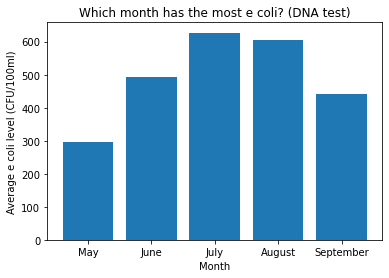

In [12]:
plt.bar(x_axis, y_axis)


plt.title("Which month has the most e coli? (DNA test)")
plt.xlabel("Month")
plt.ylabel("Average e coli level (CFU/100ml)")

plt.show()

In [13]:
dna_by_date = dna_data.groupby("Sample Date")

In [16]:
date_DNA_values = dna_by_date["DNA Reading Mean"].mean()

In [33]:
len(date_DNA_values)

433

In [20]:
dates = dna_data["Sample Date"].unique()

In [28]:
dates

array(['2019-06-03', '2019-06-04', '2020-07-06', '2020-07-08',
       '2019-06-05', '2019-06-06', '2020-07-07', '2019-06-07',
       '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-11',
       '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15',
       '2019-06-16', '2019-06-17', '2019-06-18', '2019-06-19',
       '2019-06-20', '2019-06-21', '2019-06-22', '2019-06-23',
       '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27',
       '2019-06-28', '2019-06-29', '2019-06-30', '2019-07-01',
       '2019-07-02', '2019-05-25', '2019-07-03', '2019-07-04',
       '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
       '2019-07-09', '2019-07-10', '2019-07-13', '2019-07-12',
       '2019-07-11', '2019-07-14', '2019-08-18', '2019-08-19',
       '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18',
       '2019-08-20', '2019-07-26', '2019-07-19', '2019-07-20',
       '2019-07-21', '2019-07-22', '2017-08-10', '2018-08-15',
       '2017-08-21', '2017-08-09', '2019-07-23', '2019-

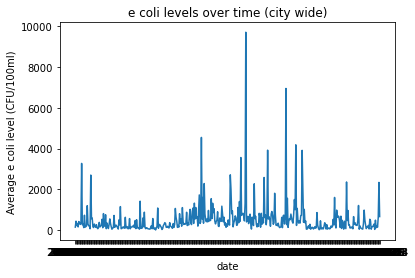

In [24]:
x_axis = dates
y_axis = date_DNA_values

plt.plot(x_axis, y_axis)


plt.title("e coli levels over time (city wide)")
plt.xlabel("date")
plt.ylabel("Average e coli level (CFU/100ml)")

plt.show()

In [39]:
date_DNA_values.to_frame()

,DNA Reading Mean
Sample Date,
2015-05-26,147.800000
2015-05-27,438.000000
2015-05-28,223.400000
2015-06-01,331.000000
2015-06-02,157.800000
...,...
2019-09-01,219.000000
2019-09-02,143.145000
2020-07-06,636.231250


In [10]:
# options from here:

# groupby month, get mean of test result per month, make a bar graph of mean grossness per month

# could also use datetime to get the month and day, subtract january 1 to get what number 
# day it is in the year, plot a line graph and label the appropriate days as as jan 1, feb 1 etc
# instead of the day of the year

#   pros: might look cooler, would sync up with weather data
#   cons: harder :)

# my thoughts - do both? bar graph of how gross the months are seems like a good quick takeaway
# but I think we need more if we want to compare with milwaukee weather

In [49]:
#finding the day of the year
#https://stackoverflow.com/questions/151199/how-to-calculate-number-of-days-between-two-given-dates

bday = datetime.date(2021, 7, 28)
day0 = datetime.date(2020, 12, 31)
delta = bday - day0

delta.days

209

In [57]:
#adding day of the year to make a date

added_back = day0 + delta
added_back

datetime.date(2021, 7, 28)

In [56]:
#putting it back in a string

f"{added_back.year}-{added_back.month}-{added_back.day}"

'2021-7-28'